In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

### CLEANING

In [65]:
data['DAILY_STRESS'].value_counts()

DAILY_STRESS
3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: count, dtype: int64

In [66]:
data = data.drop(data[data['DAILY_STRESS']=='1/1/00'].index)
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype('int64')
data['DAILY_STRESS'].value_counts()

DAILY_STRESS
3    4398
2    3407
4    2960
1    2478
5    2052
0     676
Name: count, dtype: int64

In [67]:
data.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,...,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,...,5.703588,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,666.750510
std,1.442739,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,...,2.891102,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,45.021103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,...,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [68]:
data.duplicated().sum()

482

In [69]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### ANALYSIS

## Key Takeaways

-  A healthier BMI is strongly associated with higher consumption of fruits and vegetables, more daily steps, and a sleep duration of around 7 hours.
-  Lower daily stress levels are associated with a strong core circle and social network. This can indicate that strong social connections and a supportive community can act as buffers against stress. 
-  Frequent meditation and experiencing flow are also correlated to lower stress levels.
-  Individuals who spend more time on their passions tend to experience higher levels of flow, have a clearer life vision, and achieve more. 

DEMOGRAPHICS

In [70]:
data['AGE'].value_counts()

AGE
21 to 35        5873
36 to 50        4554
51 or more      3306
Less than 20    1756
Name: count, dtype: int64

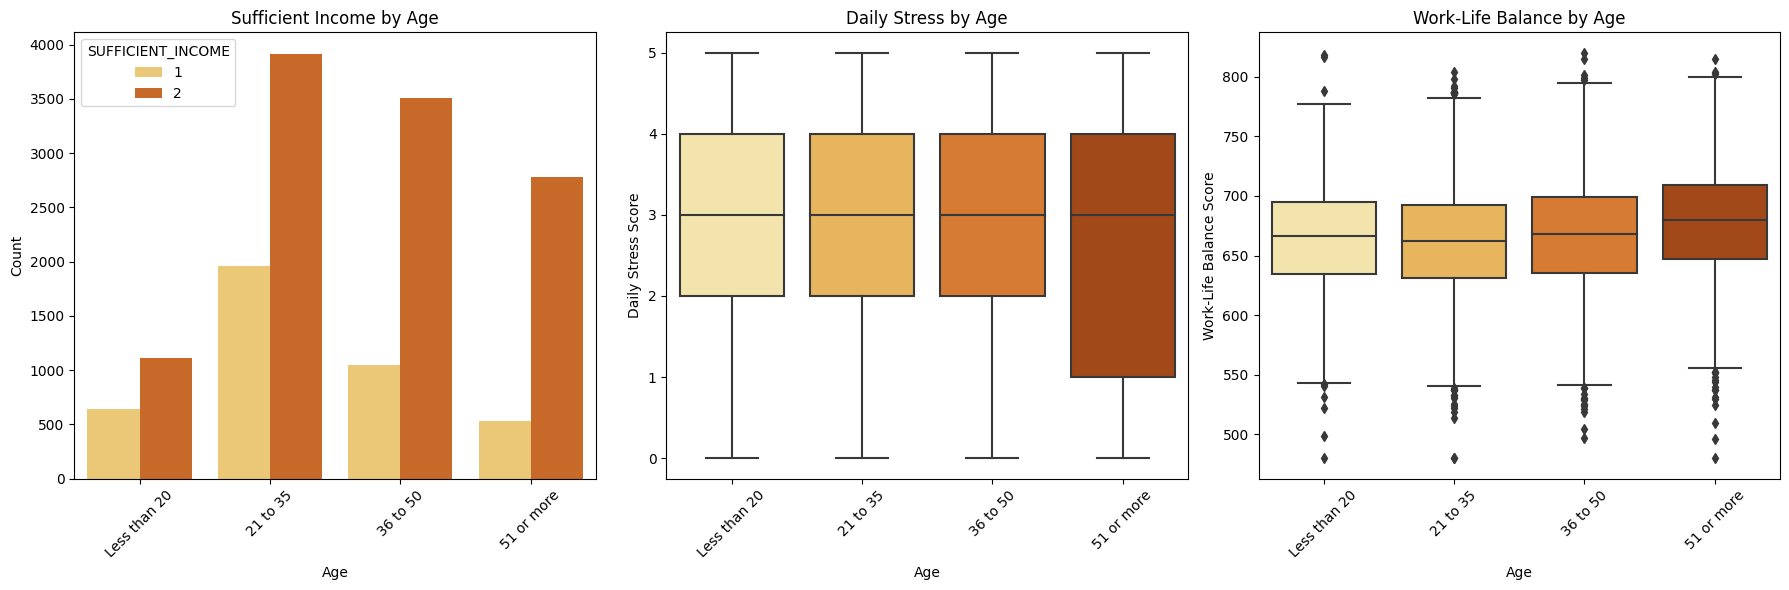

In [138]:
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
data['AGE'] = pd.Categorical(data['AGE'], categories=age_order, ordered=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='AGE', hue='SUFFICIENT_INCOME', data=data, palette='YlOrBr', ax=axes[0],order=age_order)
axes[0].set_title('Sufficient Income by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='AGE', y='DAILY_STRESS', data=data, palette='YlOrBr', ax=axes[1])
axes[1].set_title('Daily Stress by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Daily Stress Score')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='AGE', y='WORK_LIFE_BALANCE_SCORE', data=data, palette='YlOrBr', ax=axes[2])
axes[2].set_title('Work-Life Balance by Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Work-Life Balance Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



-  Daily stress levels are almost consistent across age groups. 
-  The median work life balance score is slightly higher for among older age range. 

In [19]:
data['GENDER'].value_counts()

GENDER
Female    9580
Male      5909
Name: count, dtype: int64

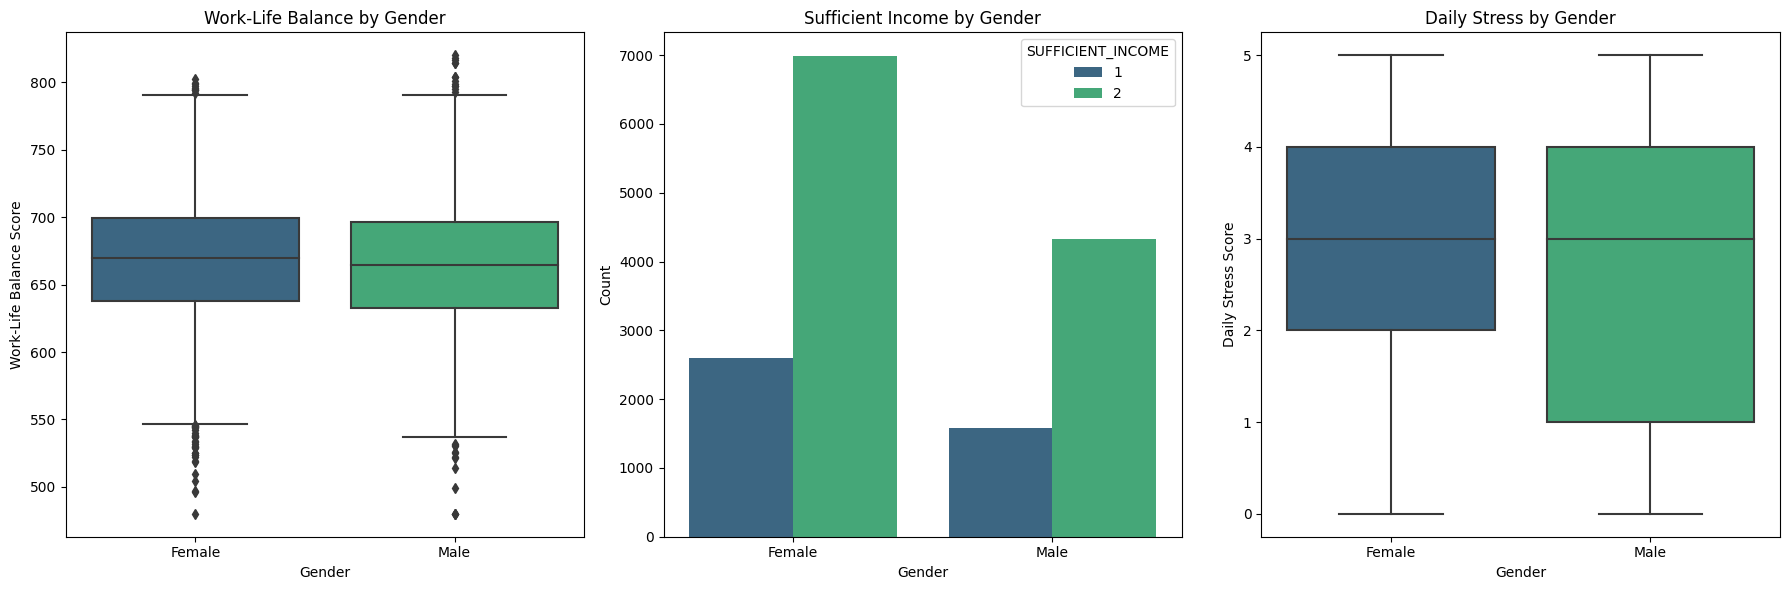

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='GENDER', y='WORK_LIFE_BALANCE_SCORE', data=data, ax=axes[0], palette='viridis')
axes[0].set_title('Work-Life Balance by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Work-Life Balance Score')

sns.countplot(x='GENDER', hue='SUFFICIENT_INCOME', data=data, palette='viridis', ax=axes[1])
axes[1].set_title('Sufficient Income by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

sns.boxplot(x='GENDER', y='DAILY_STRESS', data=data, ax=axes[2], palette='viridis')
axes[2].set_title('Daily Stress by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Daily Stress Score')

plt.tight_layout()

#### HEALTH

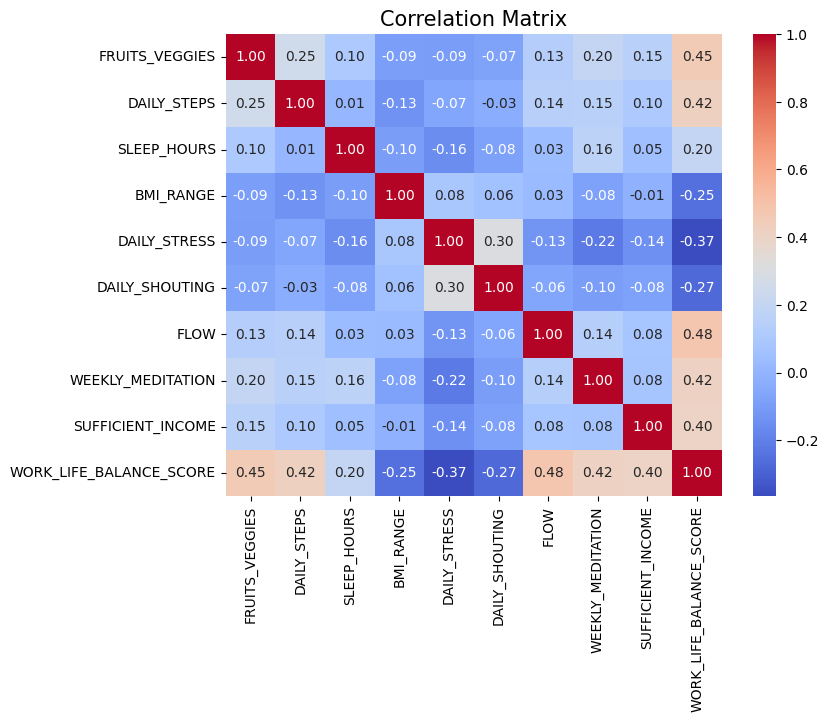

In [105]:

columns_to_include = ['FRUITS_VEGGIES','DAILY_STEPS','SLEEP_HOURS','BMI_RANGE','DAILY_STRESS','DAILY_SHOUTING','FLOW','WEEKLY_MEDITATION','SUFFICIENT_INCOME','WORK_LIFE_BALANCE_SCORE']
corr_matrix = data[columns_to_include].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', size=15)
plt.show()


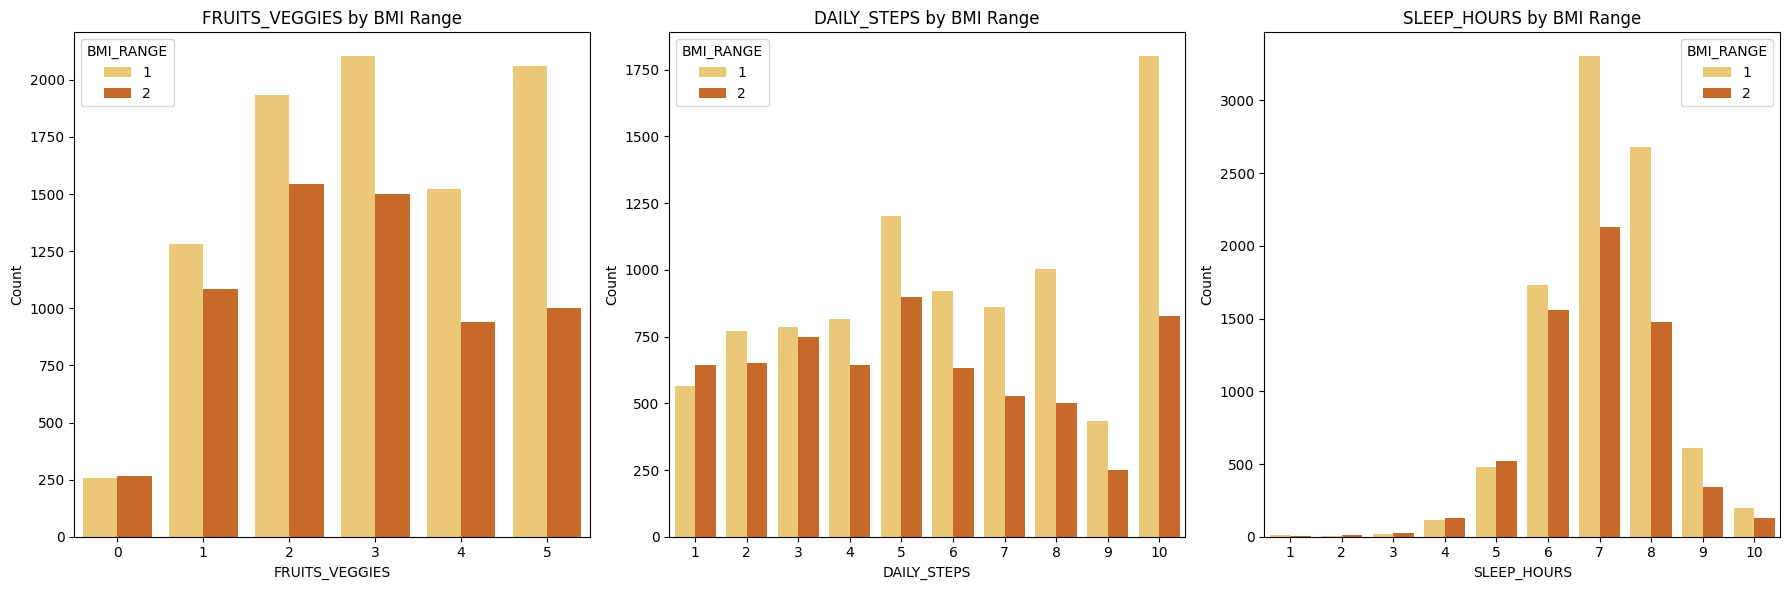

In [72]:
required_columns = ['FRUITS_VEGGIES', 'DAILY_STEPS', 'SLEEP_HOURS', 'BMI_RANGE']
if all(col in data.columns for col in required_columns):

    variables = ['FRUITS_VEGGIES', 'DAILY_STEPS', 'SLEEP_HOURS']
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, var in enumerate(variables):
        sns.countplot(x=var, hue='BMI_RANGE', data=data, palette='YlOrBr', ax=axes[i])
        axes[i].set_title(f'{var} by BMI Range')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

else:
    print(f"The dataset does not contain the required columns: {required_columns}")


-  Healthier BMI is positively associated with higher consumption of fruits and vegetables, more daily steps, and longer sleep duration.

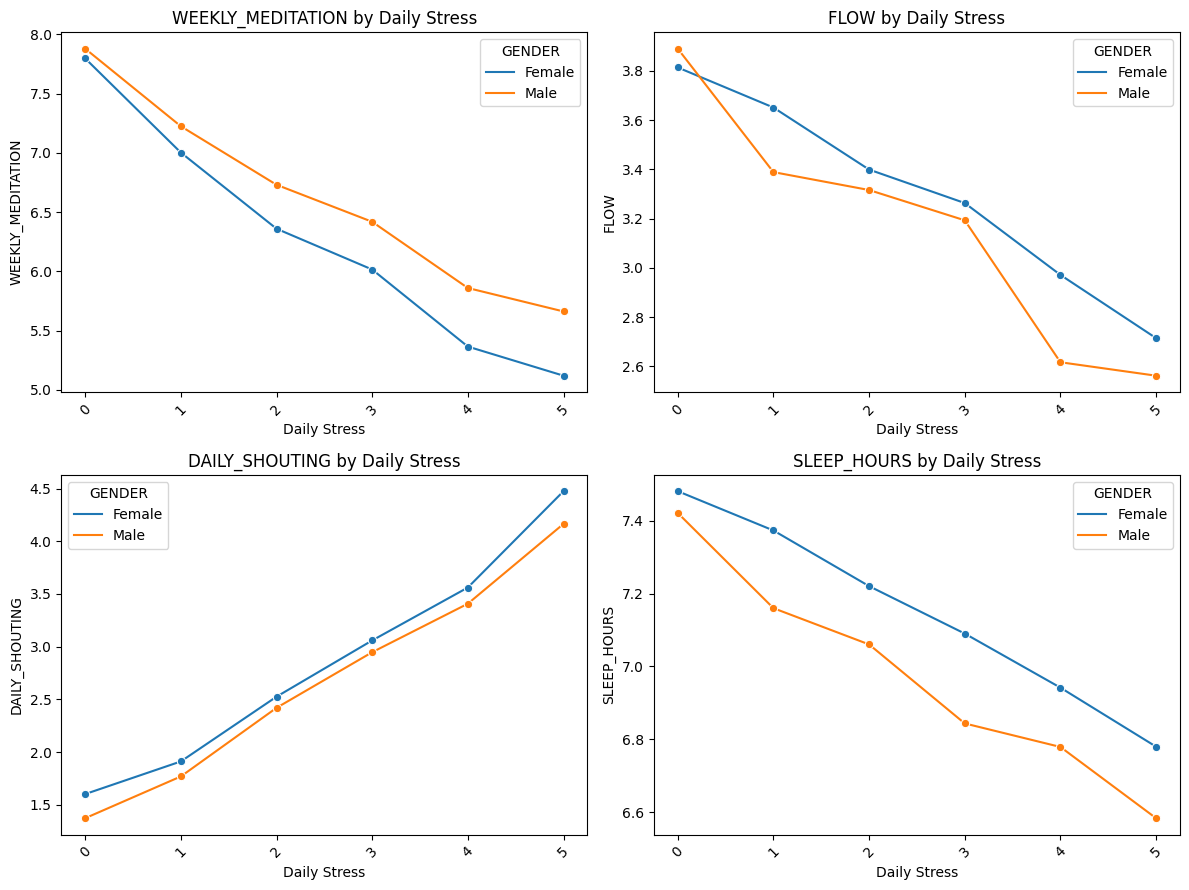

In [99]:
variables = ['WEEKLY_MEDITATION', 'FLOW', 'DAILY_SHOUTING', 'SLEEP_HOURS']
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for i, var in enumerate(variables):

    sns.lineplot(x='DAILY_STRESS', y=var, data=data, ax=axes[i], marker='o',hue='GENDER', errorbar=None)
    axes[i].set_title(f'{var} by Daily Stress')
    axes[i].set_xlabel('Daily Stress')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


-  Both genders who frequently meditate and experience flow tend to have lower stress levels.
-  The negative correlation between sleep and stress: It's possible that poor sleep quality contributes to increased stress, or that stress disrupts sleep patterns. 

#### WORK/PRODUCTIVITY

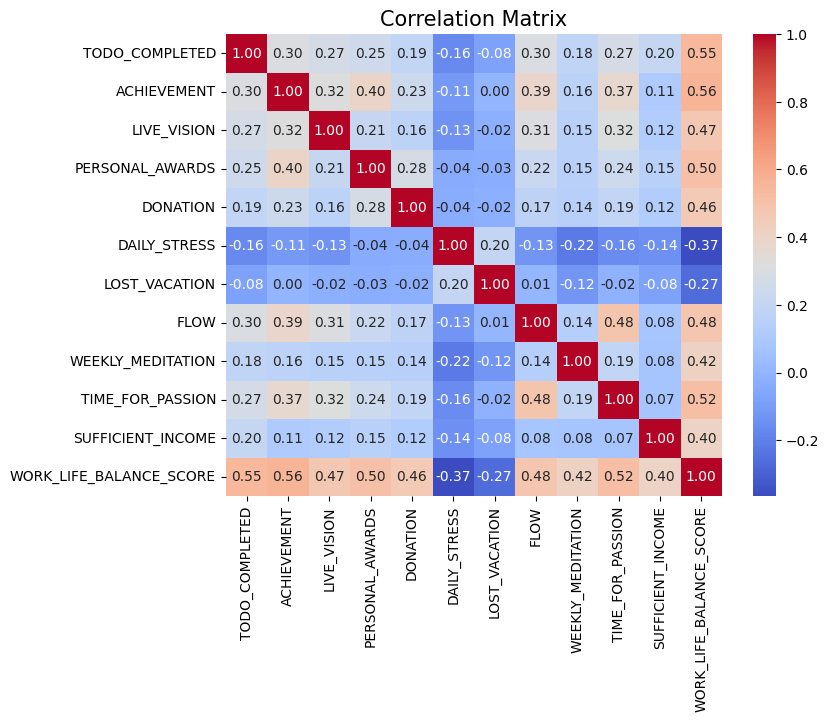

In [104]:
columns_to_include = ['TODO_COMPLETED','ACHIEVEMENT','LIVE_VISION','PERSONAL_AWARDS','DONATION','DAILY_STRESS','LOST_VACATION','FLOW','WEEKLY_MEDITATION','TIME_FOR_PASSION','SUFFICIENT_INCOME','WORK_LIFE_BALANCE_SCORE']
corr_matrix = data[columns_to_include].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', size=15)
plt.show()

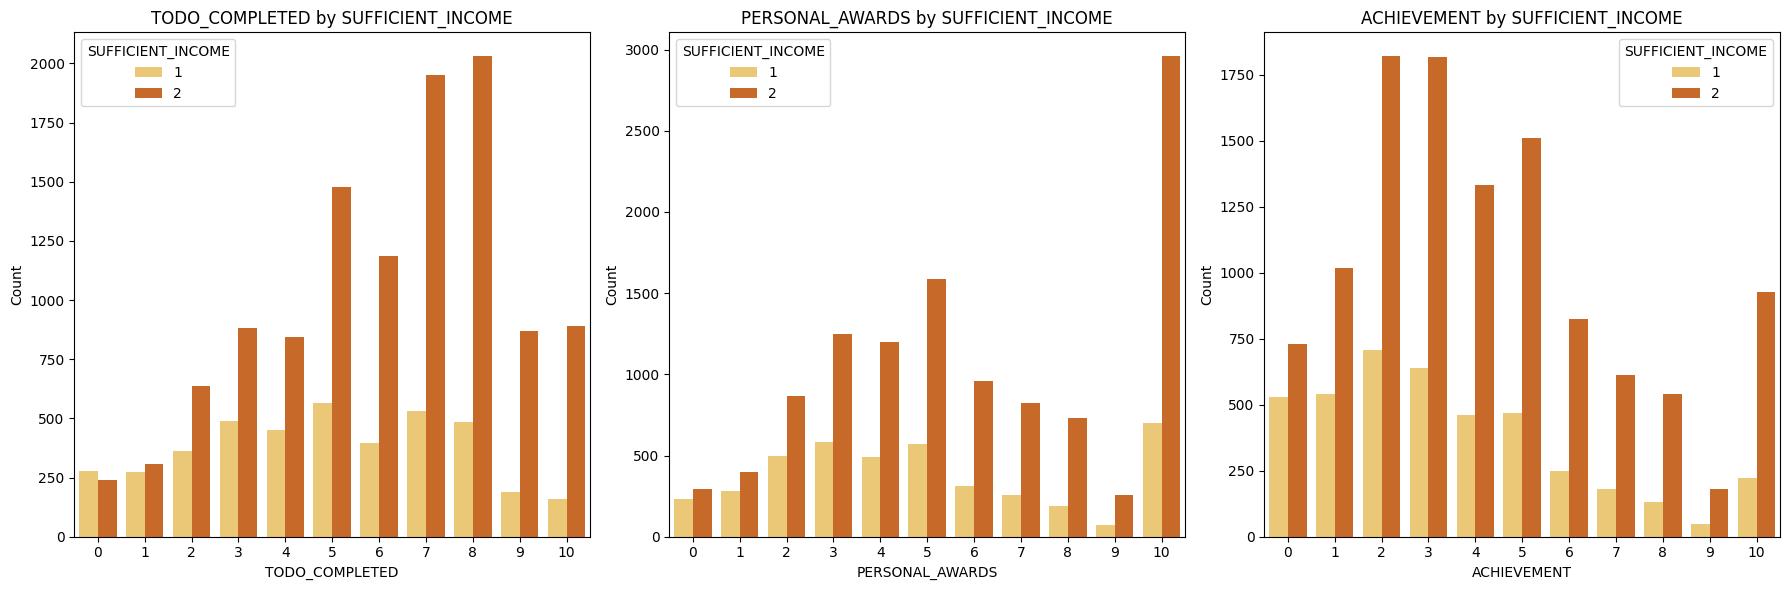

In [106]:
required_columns = ['TODO_COMPLETED', 'PERSONAL_AWARDS', 'ACHIEVEMENT']
if all(col in data.columns for col in required_columns):

    variables = required_columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, var in enumerate(variables):
        sns.countplot(x=var, hue='SUFFICIENT_INCOME', data=data, palette='YlOrBr', ax=axes[i])
        axes[i].set_title(f'{var} by SUFFICIENT_INCOME')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

else:
    print(f"The dataset does not contain the required columns: {required_columns}")


-  The performance metrics (TODO_COMPLETED, PERSONAL_AWARDS, ACHIEVEMENT) are strongly correlated to higher/sufficient income. 

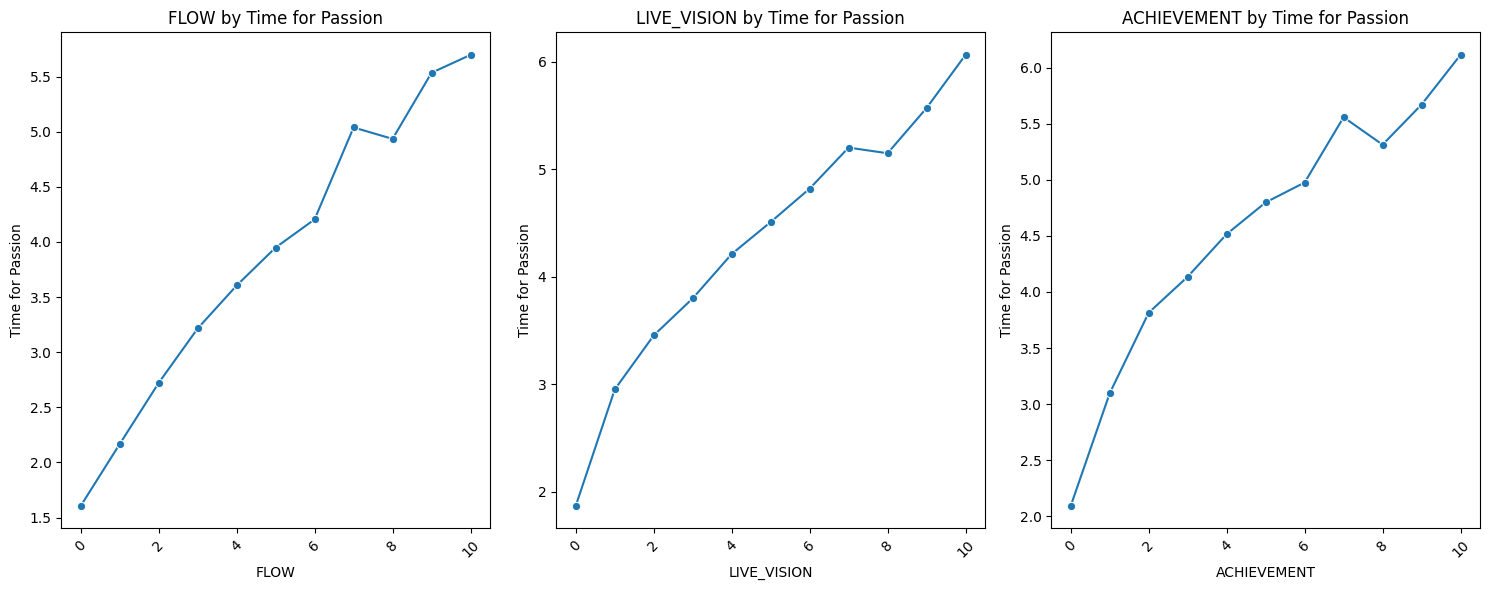

In [103]:
variables = ['FLOW', 'LIVE_VISION', 'ACHIEVEMENT']
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten() 

for i, var in enumerate(variables):
    sns.lineplot(x='TIME_FOR_PASSION', y=var, data=data, ax=axes[i], marker='o',errorbar=None)
    axes[i].set_title(f'{var} by Time for Passion')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Time for Passion')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


- Individuals who spend more time on their passions tend to experience higher levels of flow, have a clearer life vision, and achieve more.

#### SOCIAL

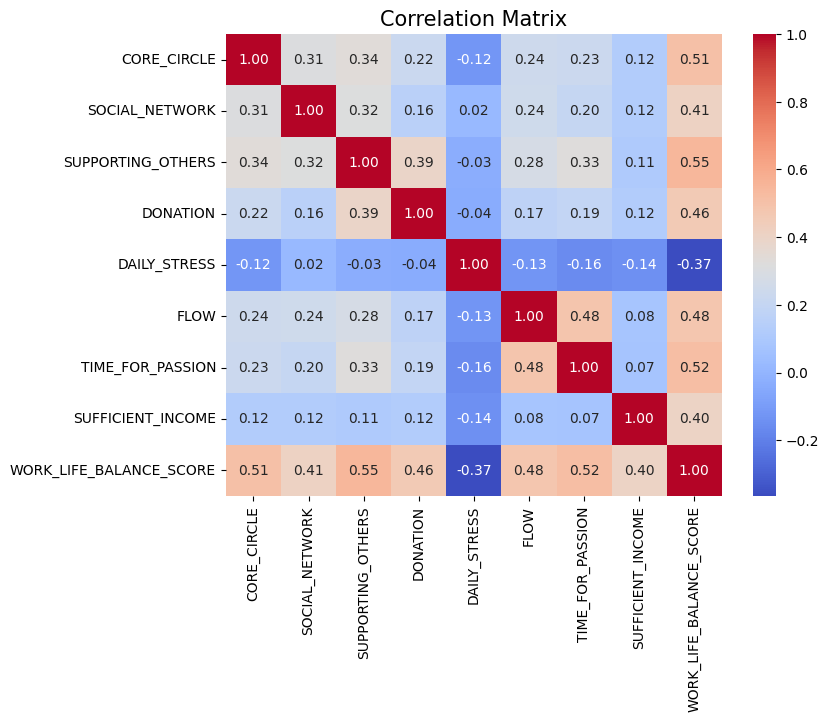

In [103]:
columns_to_include = ['CORE_CIRCLE','SOCIAL_NETWORK','SUPPORTING_OTHERS','DONATION','DAILY_STRESS','FLOW','TIME_FOR_PASSION','SUFFICIENT_INCOME','WORK_LIFE_BALANCE_SCORE']
corr_matrix = data[columns_to_include].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', size=15)
plt.show()

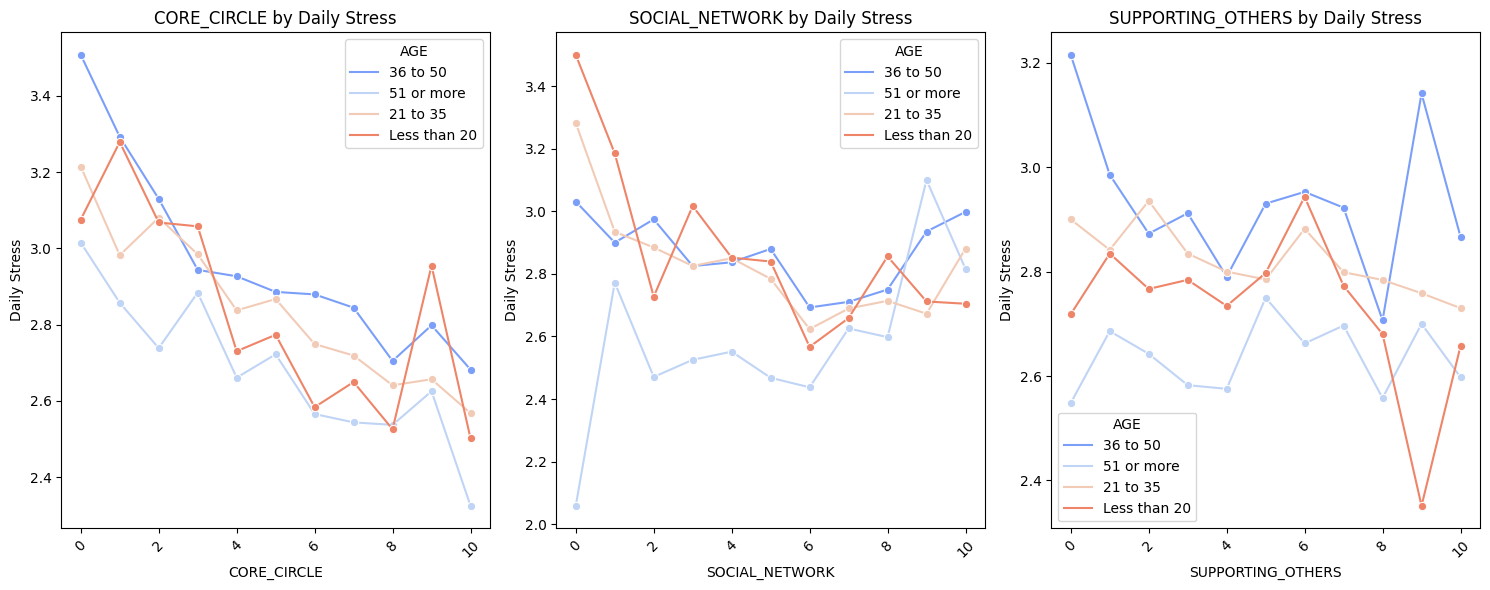

In [97]:
variables = ['CORE_CIRCLE', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS']
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten() 

for i, var in enumerate(variables):
    sns.lineplot(x=var, y='DAILY_STRESS', data=data, ax=axes[i], marker='o', hue='AGE', palette='coolwarm',errorbar=None)
    axes[i].set_title(f'{var} by Daily Stress')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Daily Stress')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

-  Daily stress negatively correlates with core circle, social network, and supporting others. 
-  This could imply that a strong core circle and social network might act as a buffer against the negative impacts of stress.
-  This trend is common accross all ages except that people aged 51 or more are more stressed the larger the social network. 